<a href="https://colab.research.google.com/github/Bartup/MIW/blob/main/MIW_Perceptron_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


##1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<ipython-input-1-6ca3de109d61>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-6ca3de109d61>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


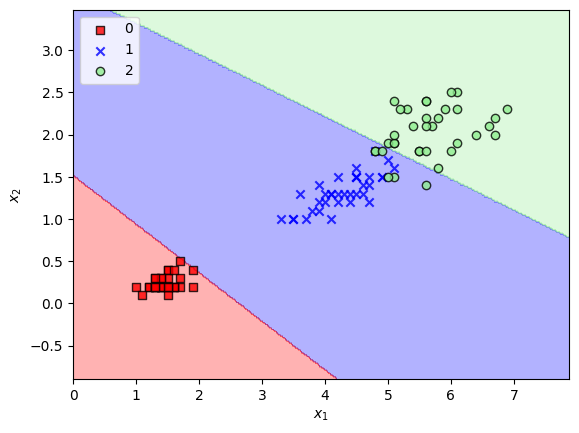

In [ ]:
class ChainedPerceptron:
    def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2

    def predict(self, X):
        pred1 = self.ppn1.predict(X)
        pred2 = self.ppn2.predict(X)
        pred1[pred1 == 1] = 0
        pred1[pred1 == -1] = 1
        
        pred2[pred2 == 1] = 0
        pred2[pred2 == -1] = 1
        return pred1 + pred2

def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    # podział danych na testowe i treningowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


    X_train_01 = np.copy(X_train)
    y_train_01 = np.copy(y_train)
    
    X_train_02 = np.copy(X_train)
    y_train_02 = np.copy(y_train)

    # w perceptronie wyjście jest albo 1 albo -1    
    y_train_01[(y_train != 0)] = -1
    y_train_01[(y_train == 0)] = 1
    
    y_train_02[(y_train == 2)] = -1
    y_train_02[(y_train != 2)] = 1

    ppn1 = Perceptron(eta=0.1, n_iter=600)
    ppn2 = Perceptron(eta=0.1, n_iter=600)
    # uczenie modelu
    ppn1.fit(X_train_01, y_train_01)
    ppn2.fit(X_train_02, y_train_02)

    # wyświetla wykres
    plot_decision_regions(X=X_train, y=y_train, classifier=ChainedPerceptron(ppn1, ppn2))
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()
    

if __name__ == '__main__':
    main()

##2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=600, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

<ipython-input-4-bc51ad084d24>:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
<ipython-input-1-6ca3de109d61>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-6ca3de109d61>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


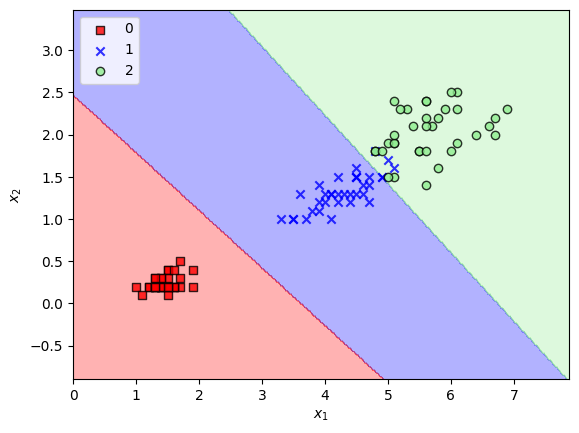

In [ ]:
class ChainedLR:
    def __init__(self, lrgd1, lrgd2):
        self.lrgd1 = lrgd1
        self.lrgd2 = lrgd2

    def predict(self, X):
        pred1 = self.lrgd1.predict(X)
        pred2 = self.lrgd2.predict(X)
        return pred1 + pred2

def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    X_train_01 = np.copy(X_train)
    y_train_01 = np.copy(y_train)
    
    X_train_02 = np.copy(X_train)
    y_train_02 = np.copy(y_train)
    
    y_train_01[(y_train != 0)] = 1
    
    y_train_02[(y_train != 2)] = 0
    y_train_02[(y_train == 2)] = 1
    

    lrgd1 = LogisticRegressionGD(eta=0.05, n_iter=20000, random_state=1)
    lrgd2 = LogisticRegressionGD(eta=0.05, n_iter=20000, random_state=1)
    # uczenie modelu
    lrgd1.fit(X_train_01, y_train_01)
    lrgd2.fit(X_train_02, y_train_02)

    plot_decision_regions(X=X_train_01, y=y_train, classifier=ChainedLR(lrgd1, lrgd2))
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

##3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

# Program

Perceptron dla 3 klas

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


X_train_01 = np.copy(X_train)
y_train_01 = np.copy(y_train)

X_train_02 = np.copy(X_train)
y_train_02 = np.copy(y_train)

y_train_01[(y_train != 0)] = 1

y_train_02[(y_train != 2)] = 0
y_train_02[(y_train == 2)] = 1

lrgd1 = LogisticRegressionGD(eta=0.05, n_iter=30000, random_state=1)
lrgd2 = LogisticRegressionGD(eta=0.05, n_iter=30000, random_state=1)

lrgd1.fit(X_train_01, y_train_01)
lrgd2.fit(X_train_02, y_train_02)

def probabilities(X):
    net1 = lrgd1.net_input(X)
    net2 = lrgd2.net_input(X)
    net1_act = lrgd1.activation(net1)
    net2_act = lrgd2.activation(net2)
    return np.array([
            1 - net1_act,
            np.abs(net1_act - net2_act),
            net2_act,
            ChainedLR(lrgd1, lrgd2).predict(X)
        ]).T

probabilities(X_train)

<ipython-input-4-bc51ad084d24>:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))


array([[9.99987029e-01, 1.29705067e-05, 2.60388172e-30, 0.00000000e+00],
       [9.99924465e-01, 7.55346581e-05, 1.44609074e-28, 0.00000000e+00],
       [1.38333789e-13, 1.17897673e-08, 9.99999988e-01, 2.00000000e+00],
       [7.30526750e-14, 1.43911083e-09, 9.99999999e-01, 2.00000000e+00],
       [9.99995993e-01, 4.00697383e-06, 1.78884093e-31, 0.00000000e+00],
       [9.99200722e-15, 4.17330615e-11, 1.00000000e+00, 2.00000000e+00],
       [4.44089210e-16, 7.99360578e-15, 1.00000000e+00, 2.00000000e+00],
       [9.99995993e-01, 4.00697383e-06, 1.78884093e-31, 0.00000000e+00],
       [2.91633384e-12, 1.28337182e-06, 9.99998717e-01, 2.00000000e+00],
       [4.36290294e-08, 9.99377626e-01, 6.22330248e-04, 1.00000000e+00],
       [1.17295671e-03, 9.98827043e-01, 1.30440308e-13, 1.00000000e+00],
       [1.13219417e-06, 9.99998599e-01, 2.69135077e-07, 1.00000000e+00],
       [9.99992791e-01, 7.20920343e-06, 6.82490307e-31, 0.00000000e+00],
       [5.70246598e-08, 9.99533003e-01, 4.66939585e